# AOS 51, Fall 2018, Lab #3

So far we have plotted with built-in commands in Pandas. Today, we'll learn how to formally create beautiful plots using `matplotlib`. Then, we'll start working with gridded climate data using `xarray`. 

---

In [1]:
# import all the packages we need for this lab
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

---
## Terminology 

Let's view [this Jupyer Notebook](https://github.com/matplotlib/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part1-Figures_Subplots_and_layouts.ipynb) to visualuze how Matplotlib defines three terms:

1. Figure
2. Axes/subplot
3. Y-axis and X-axis 

We see that:

1. The "Figure" is the highest-level container of the plot. It encapsulates the entire page where stuff is drawn. 

2. "Axes" are the area that we plot data on, along with any ticks/labels/etc associated with it. An Axes is created with a call to `subplot`, so Axes and Subplot are mostly synonymous terms now. 

3. Each Axes has an "XAxis" and a "YAxis". These contain the ticks, tick locations, labels, etc.
---

## Creating a plot

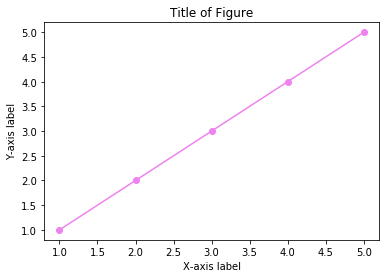

In [2]:
# Create some sample data
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

fig = plt.figure() # create a Figure
ax = fig.add_subplot(1,1,1) # add a Subplot in the Figure, where (row #, col #, subplot #) = (1, 1, 1)
ax.plot(x_data, y_data, color='violet', marker='o') # add data to the Axes/subplot
ax.set_title('Title of Figure')
ax.set_xlabel('X-axis label')
ax.set_ylabel('Y-axis label')
plt.show()

** --- In-class exercise -- **

Let's use `matplotlib` to create a nice line plot of monthly-average high temperature over Baltimore, MD:

| Month | Temp (F)|
|---|---|
|January|42.4|
|February|45.7|
|March|53.9|
|April|65.5|
|May|75.2|
|June|85.0|
|July|89.0|
|August|87.0|
|September|80.3|
|October|68.4|
|November|57.7|
|December|46.1|

Steps:
1. Use [np.arange()](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.arange.html) to create a range of month indices spanning 1 through 12. Assign this array to the variable name `months`. 
2. Create a list of monthly-average high temperatures called `temperature`.
2. With `temperature` on the y-axis and `hours` on the x-axis, create a line plot using `matplotlib`. Make sure you give your plot a title and label the x- and y-axis.

## Customizing the ticks and tick-labels
So far, we've let matplotlib figure out the best tick spacing and labels for our plots, but they are highly customizable.

** Setting x-ticks and y-ticks**

We can manually set the [x-ticks](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html) and [y-ticks](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.yticks.html) using:

`ax.set_xticks([list or 1D array of tick locations])`

`ax.set_yticks([list or 1D array of tick locations])`

** Setting x-ticklabels and y-ticklabels **

We can set the [x-ticklabels](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html) and [y-ticklabels](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_yticklabels.html) using:

`ax.set_xticklabels([list of tick labels as strings])`

`ax.set_yticklabels([list of tick labels as strings])`

** Example **

If we have 12 data points representing some values for a given calendar month, we can set 12 x-ticks with labels as:

`ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])` 

OR 

`ax_set_xticks(np.arange(1,13))`

`ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])`

** -- In-class exercise -- **

Revise your plot of Baltimore monthly-temperatures to have 12 `xticks` with corresponding monthly `xticklabels`. The labels can be full month names or abbreviated (e.g. 'Jan', or 'J'). 

## Multi-panel plots

Multi-panel plots have two differences from the single-panel plots we have worked with so far:

1. Each sub-panel needs to have a unique `axes` (e.g. `ax1`, `ax2`, etc.)
2. The sub-panel position needs to be defined when added to the figure in the (row #, col #, plot #) call.

Let's demonstate with a 1 row x 2 column multi-panel plot:

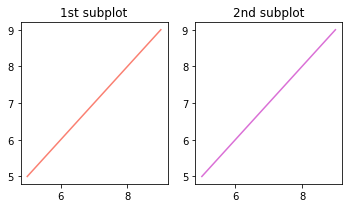

In [3]:
fig = plt.figure(figsize=(5,3)) # specify the figure (width, height) in unit inches

ax1 = fig.add_subplot(1,2,1) # 1 row, 2 columns, 1st subplot
ax1.plot(np.arange(5,10), np.arange(5,10), color='salmon')
ax1.set_title('1st subplot')

ax2 = fig.add_subplot(1,2,2) # 1 row, 2 columns, 2nd subplot
ax2.plot(np.arange(5,10), np.arange(5,10), color='orchid')
ax2.set_title('2nd subplot')

fig.tight_layout() # automatically adjusts subplots to fit in the figure
plt.show()

** -- In-class exercise -- **

Create a new 4-panel plot showing monthly-average high temperature (F), low temperature (F), precipitation (inches), and snowfall (inches) for Baltimore, MD. 

* High and low temperature should be line plots
* Precipitation and snowfall should be bar plots

Monthly-average (Jan - Dec) low temperature, precipitation and snowfall data are provided below. The high temperature data is the same as used in the previous exercise. 

In [6]:
high_temp = [42.4, 45.7, 53.9, 65.5, 75.2, 85.0, 89.0, 87.0, 80.3, 68.4, 57.7, 46.1]
low_temp = [29.2, 31.4, 38.8, 47.6, 56.9, 67.1, 72.5, 70.9, 63.8, 51.8, 42.9, 32.8]
precip = [2.92, 2.60, 3.86, 3.22, 3.49, 3.27, 4.62, 3.39, 4.09, 3.05, 2.97, 3.41]
snow = [6.8, 8.0, 1.9, 0, 0, 0, 0, 0, 0, 0, 0.4, 3.0] 

---
## Unix/Linux 101

Let's switch gears for a bit and learn some basic Linux commands. This will help us organize our data and scripts going forward. 

### Navigating through the Terminal

There are **directories** and **files** on your computer. Files are contained within directories. You've likely made Folders to categorize files before. Folders are equivalent to directories in the Linux lingo. 

So, to navigate through the Terminal, we just need to know:
* How to move between directories 
* See what files are in those directories
* Create or remove directories 
* Create or remove files in directories 

First, let's open a new Terminal shell:

* Go to the Terminal Application and hit command+N or click on the top navigation bar Shell -> New Window.

Then, let's cover some fundamental Linux/Unix commands:

* `pwd` - print working (i.e. current) directory
* `ls` - list the contents of the current directory
* `cd` - change directory from the current directory to a different directory
* `mkdir` - make directory
* `rmdir` - remove directory
* `cp` - copy a file from one name to another, or from one directory to another
* `mv` - move a file from one name to another, or from one directory to another 



## Creating new directories to store our data files and scripts

Let's navigate to the home directory (e.g. `/Users/joebruin/`), then create a new directory called "research" with sub-directories "data" and "scripts".

Note: the `>>>` means "entered in the terminal shell".

`>>> cd /Users/joebruin/` (change directories to our home directory)

`>>> cd ~` (alternatively, you can use the special tilde (`~`) symbol to change to the home directory

`>>> pwd` (confirm that we are currently in the home directory)

`>>> ls` (list all contents of the home directory)

`>>> mkdir research` (make a new directory called "research")

`>>> cd research` (change directories into the new "research" directory)

`>>> mkdir data` (make a new directory inside "research" called "data")

`>>> mkdir scripts` (make a new directory inside "research" called "scripts")

`>>> ls` (confirm that two new directories exist) 

## Moving downloaded data and scripts into the new directories

Now that we've created `data` and `scripts` directories, let's go back to the Google Drive and download the file called `skt_sfc_mon_mean_1998_2017.nc`. Once the file is downloaded, we can move it from the Downloads directory to the new `data` directory.

In general, the `mv` command takes the form `mv [source directory/file] [destination directory/file]`

`>>> mv /Users/joebruin/Downloads/skt_sfc_mon_mean_1998_2017.nc /Users/joebruin/research/data`

Alternatively, you can change directories to `/Users/joebruin/research/data/` and then use a period `.`, which means "current directory":

`>>> cd /Users/joebruin/research/data/`

`>>> mv /Users/joebruin/Downloads/skt_sfc_mon_mean_1998_2017.nc .`

Let's also copy the Jupyter Notebook for this lab to the `scripts` directory. 

`>>> cp /Users/joebruin/Downloads/AOS_51_2018_Lab_3.ipynb /Users/joebruin/research/scripts/`

Now you can exit this current notebook and re-open the notebook from the `scripts` directory. 

## Working with netcdf files

Now that we have our research structure setup, let's learn a bit about netCDF files and work with them using the `xarray` package in Python. 

### What does netCDF mean?

**Net**work **C**ommon **D**ata **F**orm (or [netCDF](https://en.wikipedia.org/wiki/NetCDF)) is a set of software libraries to manipulate array-oriented (i.e. multi-dimensional) weather and climate data. netCDF files all end with the extension ".nc".

---

### Opening and reading netCDF files
We'll be working with a file called `skt_sfc_mon_mean_1998_2017.nc`. This file is from the [NCEP-DOE 2 Reanalysis](https://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis2.gaussian.html) and contains global monthly-mean skin-temperature at the surface from January 1998 - December 2017.

Replace "nberg" with your username in the path below to load the netcdf file. 

In [4]:
ncfile = xr.open_dataset('/Users/nberg/research/data/skt_sfc_mon_mean_1998_2017.nc')
ncfile

<xarray.Dataset>
Dimensions:    (lat: 94, lon: 192, nbnds: 2, time: 240)
Coordinates:
  * lat        (lat) float32 -88.542 -86.6531 -84.7532 -82.8508 -80.9473 ...
  * lon        (lon) float32 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.125 ...
  * time       (time) datetime64[ns] 1998-01-01 1998-02-01 1998-03-01 ...
Dimensions without coordinates: nbnds
Data variables:
    skt        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) float64 ...
Attributes:
    Conventions:               CF-1.0
    title:                     Monthly NCEP/DOE Reanalysis 2
    history:                   Thu May 17 17:38:09 2018: ncpdq -a -lat skt_sf...
    comments:                  Data is from \nNCEP/DOE AMIP-II Reanalysis (Re...
    platform:                  Model
    source:                    NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:               National Centers for Environmental Prediction
    dataset_title:             NCEP-DOE AMIP-II Reanalysis
    References:      

### Structure of netCDF data

Data in netCDF files are divided by:

* **dimensions** - spatial (e.g. `latitude` and `longitude`) and temporal (e.g. `time`) dimensions 
* **variables** - climate variables in contained in the file (e.g. `skt`)
* **attributes** - metadata to the file itself, and for a given variable (e.g. the units of a variable)
* **coordinates** (these are of secondary importance to us for now) 

# Extracting variables

We can extract variables from an xarray Dataset with similar syntax as extracting columns from a Pandas Dataframe.

Note how the data format changes from a `Dataset` (multiple variables) to a `DataArray` (single variable). 

In [5]:
skt = ncfile['skt']
skt

<xarray.DataArray 'skt' (time: 240, lat: 94, lon: 192)>
[4331520 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -88.542 -86.6531 -84.7532 -82.8508 -80.9473 ...
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.125 15.0 ...
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 1998-03-01 ...
Attributes:
    long_name:             Monthly Mean of Forecast of SST/Land Skin Temperat...
    valid_range:           [-32765  -1765]
    unpacked_valid_range:  [ 120.  430.]
    actual_range:          [ 190.85420227  314.58322144]
    units:                 degK
    precision:             2
    GRIB_id:               11
    GRIB_name:             TMP
    var_desc:              Skin Temperature
    dataset:               NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly...
    level_desc:            Surface
    statistic:             Individual Obs
    parent_stat:           Other
    standard_name:         temperature
    cell_methods:          time: mean 

### Slicing/selecting data by dimension labels

We can subset data using dimension names and values using the `sel` command. 

In [6]:
# Select a single time:
skt.sel(time='2005-06')

<xarray.DataArray 'skt' (time: 1, lat: 94, lon: 192)>
array([[[ 227.429993,  227.300003, ...,  227.699997,  227.559998],
        [ 229.279999,  229.      , ...,  229.880005,  229.569992],
        ..., 
        [ 271.97998 ,  271.98999 , ...,  271.910004,  271.950012],
        [ 271.869995,  271.869995, ...,  271.859985,  271.859985]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.542 -86.6531 -84.7532 -82.8508 -80.9473 ...
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.125 15.0 ...
  * time     (time) datetime64[ns] 2005-06-01
Attributes:
    long_name:             Monthly Mean of Forecast of SST/Land Skin Temperat...
    valid_range:           [-32765  -1765]
    unpacked_valid_range:  [ 120.  430.]
    actual_range:          [ 190.85420227  314.58322144]
    units:                 degK
    precision:             2
    GRIB_id:               11
    GRIB_name:             TMP
    var_desc:              Skin Temperature
    dataset:               NCEP/D

In [7]:
# Select a single time, lat, and lon
# Note how we need to include the method='nearest' argument, e.g. find the grid cell nearest to 37 degN, 235 degE
skt.sel(time='2010-01', lat=37, lon=235, method='nearest')

<xarray.DataArray 'skt' (time: 1)>
array([ 286.26001], dtype=float32)
Coordinates:
    lat      float32 37.1422
    lon      float32 234.375
  * time     (time) datetime64[ns] 2010-01-01
Attributes:
    long_name:             Monthly Mean of Forecast of SST/Land Skin Temperat...
    valid_range:           [-32765  -1765]
    unpacked_valid_range:  [ 120.  430.]
    actual_range:          [ 190.85420227  314.58322144]
    units:                 degK
    precision:             2
    GRIB_id:               11
    GRIB_name:             TMP
    var_desc:              Skin Temperature
    dataset:               NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly...
    level_desc:            Surface
    statistic:             Individual Obs
    parent_stat:           Other
    standard_name:         temperature
    cell_methods:          time: mean (monthly of 6-hourly values)

In [8]:
# Select a slice of labels 
# Now, we don't need to include the method='nearest' command when slicing a range of lat/lon labels
skt.sel(time=slice('2010-01','2014-12'), lat=slice(25,45))

<xarray.DataArray 'skt' (time: 60, lat: 11, lon: 192)>
[126720 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 25.7139 27.6186 29.5234 31.4281 33.3328 35.2375 ...
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.125 15.0 ...
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 2010-03-01 ...
Attributes:
    long_name:             Monthly Mean of Forecast of SST/Land Skin Temperat...
    valid_range:           [-32765  -1765]
    unpacked_valid_range:  [ 120.  430.]
    actual_range:          [ 190.85420227  314.58322144]
    units:                 degK
    precision:             2
    GRIB_id:               11
    GRIB_name:             TMP
    var_desc:              Skin Temperature
    dataset:               NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly...
    level_desc:            Surface
    statistic:             Individual Obs
    parent_stat:           Other
    standard_name:         temperature
    cell_methods:          time: mea

In [9]:
# Select a slice of times and a single lat/lon 
# Need to do this in two selecting commands:
ncfile['skt'].sel(time=slice('2010-01','2014-12')).sel(lat=45.1, lon=200.5, method='nearest')

<xarray.DataArray 'skt' (time: 60)>
array([ 280.73999 ,  280.330017,  280.080017,  280.109985,  280.660004,
        282.049988,  286.5     ,  289.48999 ,  290.27002 ,  285.119995,
        282.470001,  281.529999,  280.669983,  280.690002,  280.429993,
        280.649994,  281.399994,  282.910004,  288.039978,  292.220001,
        288.539978,  285.640015,  284.27002 ,  283.220001,  281.570007,
        281.160004,  280.589996,  280.369995,  281.      ,  281.919983,
        286.299988,  288.339996,  288.880005,  285.059998,  283.429993,
        282.099976,  281.      ,  280.869995,  280.52002 ,  281.209991,
        283.089996,  284.109985,  287.02002 ,  289.419983,  288.959991,
        287.700012,  285.859985,  284.619995,  283.190002,  281.789978,
        281.089996,  281.179993,  281.399994,  283.649994,  285.720001,
        288.119995,  289.459991,  287.179993,  283.899994,  282.029999], dtype=float32)
Coordinates:
    lat      float32 44.7611
    lon      float32 200.625
  * time     

---
**In-class exercise**

1. Subset 2000-2005 skin temperature at the grid cell nearest to Seattle, WA (47.6 N, 237.7 E).
2. Subset November 1999 skin temperature for latitude nearest to 35 degrees N and all longitudes. 
3. Subset 2015-2017 skin temperature for latitudes within 10-20 degrees N and longitude 90-130 degrees E. 
---

### Simple xarray plotting

xarray also has simple, yet powerful, [plotting capabilities](https://xarray.pydata.org/en/stable/plotting.html) build on top of matplotlib. 

Now we get to play around with [colormaps](https://matplotlib.org/examples/color/colormaps_reference.html).

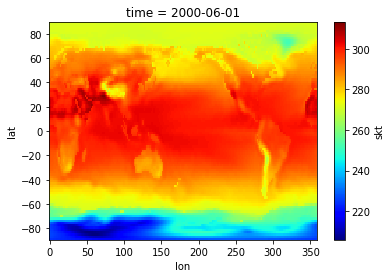

In [15]:
# Skin temperature map on 2000-06-01
skt.sel(time='2000-06-01').plot(cmap='jet')

** -- In-class exercise -- **

Extract skin temperature on August 2010 and make a global map of it.

### Simple Statistics

Like Pandas, we can quickly compute the mean, min, max, standard deviation, etc:

In [17]:
# Average across all dimensions (empty parentheses)
skt.mean()

# Average across a specific dimension: .mean(dim=['name of dimension'])
skt.mean(dim='time')

# Maximums across the lat and lon dimensions
skt.max(dim='lat').max(dim='lon')

# Minimum across the entire time series for a subsetted location (Seattle)
skt.sel(lat=47.6, lon=237.7, method='nearest').min(dim='time')

<xarray.DataArray 'skt' ()>
array(270.17999267578125)
Coordinates:
    lat      float32 46.6658
    lon      float32 238.125

** -- In-class exercise -- **

Compute the maximum monthly temperature during the entire time series for the grid cell nearest to San Francisco (37.8 N, 237.6 E).

Bonus: convert the value from degrees K to degrees Fahrenheit.

### Resampling to a new temporal frequency

Just like Pandas, we can use the `resample` command to quickly translate monthly data to annual data, for example. 

In [19]:
# Resample monthly to annual data and compute annual-means
skt.resample(time='AS').mean(dim='time')

<xarray.DataArray 'skt' (time: 20, lat: 94, lon: 192)>
array([[[ 229.554993,  229.385849, ...,  229.896667,  229.72583 ],
        [ 231.493347,  231.104172, ...,  232.280823,  231.886673],
        ..., 
        [ 256.226624,  255.869156, ...,  256.215851,  256.2258  ],
        [ 255.885864,  255.646667, ...,  255.669998,  255.669174]],

       [[ 229.291687,  229.111679, ...,  229.645828,  229.467484],
        [ 231.484146,  231.09082 , ...,  232.268356,  231.875839],
        ..., 
        [ 257.089996,  257.004181, ...,  257.009979,  257.053314],
        [ 256.615021,  256.749176, ...,  256.729156,  256.415802]],

       ..., 
       [[ 230.455856,  230.307495, ...,  230.748337,  230.601669],
        [ 232.018356,  231.640823, ...,  232.786682,  232.397507],
        ..., 
        [ 259.7883  ,  259.863373, ...,  259.60498 ,  259.659119],
        [ 259.640839,  259.742493, ...,  259.706665,  259.630005]],

       [[ 228.914993,  228.73584 , ...,  229.277512,  229.095825],
        [ 230

** -- In-class exercise -- **

* Resample `skt` from monthly to annual frequency and compute the maximum annual temperatures for each grid cell.
* Slice out the maximum annual temperature for 2015 and make a global map of it

### Groupby for quick seasonal statistics

`groupby` is similar to `resample`, but is even more flexible and offers us a way to quickly generate seasonal statistics:

In [10]:
# Seasonal means
# Note the *new dimension* called season (came from old dimension of time)
skt.groupby('time.season').mean(dim='time')

<xarray.DataArray 'skt' (season: 4, lat: 94, lon: 192)>
array([[[ 240.672363,  240.536636, ...,  240.948807,  240.809677],
        [ 242.376465,  242.044327, ...,  243.048508,  242.710693],
        ..., 
        [ 246.949799,  247.030823, ...,  246.83316 ,  246.947723],
        [ 246.211212,  246.405182, ...,  246.361679,  246.160324]],

       [[ 222.361069,  222.170639, ...,  222.737778,  222.5495  ],
        [ 224.456146,  224.025146, ...,  225.316833,  224.88649 ],
        ..., 
        [ 271.580139,  271.600494, ...,  271.562012,  271.579834],
        [ 271.607971,  271.669312, ...,  271.65799 ,  271.604492]],

       [[ 224.402328,  224.190979, ...,  224.822296,  224.613907],
        [ 226.701553,  226.214661, ...,  227.667023,  227.187103],
        ..., 
        [ 254.231796,  254.262497, ...,  254.168854,  254.254654],
        [ 254.040985,  254.142868, ...,  254.114838,  254.016632]],

       [[ 228.644669,  228.473846, ...,  228.987793,  228.815536],
        [ 230.367981,  22

In [11]:
# Extracting a single season
skt_djf = skt.groupby('time.season').mean(dim='time').sel(season='DJF')
skt_djf

<xarray.DataArray 'skt' (lat: 94, lon: 192)>
array([[ 240.672363,  240.536636,  240.401367, ...,  241.087173,  240.948807,
         240.809677],
       [ 242.376465,  242.044327,  241.718811, ...,  243.389633,  243.048508,
         242.710693],
       [ 243.3871  ,  242.873016,  242.365021, ...,  244.954803,  244.434357,
         243.909866],
       ..., 
       [ 247.480667,  247.669815,  247.819351, ...,  247.014496,  247.131302,
         247.340393],
       [ 246.949799,  247.030823,  247.12944 , ...,  246.711472,  246.83316 ,
         246.947723],
       [ 246.211212,  246.405182,  246.39035 , ...,  246.304855,  246.361679,
         246.160324]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.542 -86.6531 -84.7532 -82.8508 -80.9473 ...
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.125 15.0 ...
    season   <U3 'DJF'

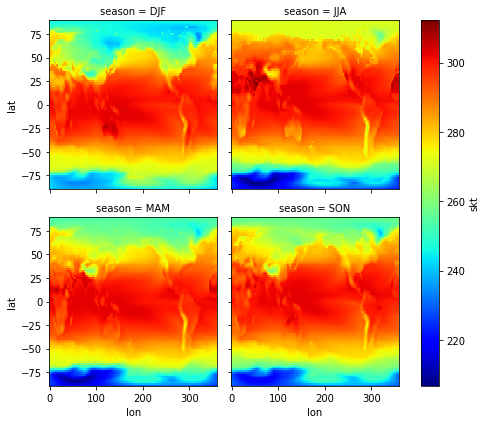

In [12]:
# Easy to plot the 4 seasons using simple xarray plotting function with wrapped columns
skt.groupby('time.season').mean('time').plot(cmap='jet', col='season', col_wrap=2)

** -- In-class exercise -- **

* Slice out 2001-2010 data from the entire timeseries
* Compute the seasonal-mean temperature during that 10-year span
* Create a 4-panel plot of seasonal-mean temperature

** -- In-class exercise --**

1. Download the following two files from the Google Drive:
    * `air2m_mon_CCSM4_1976_2005.nc`
        * Jan. 1976 - Dec 2005 monthly near-surface air temp from the CCSM4 global climate model
    * `air2m_mon_CCSM4_2076_2100_RCP85.nc`
        * Jan. 2076 - Dec 2100 monthly near-surface air temp from CCSM4 under the RCP8.5 emissions scenarios
2. Move both files to your local `data` directory. 
3. Open the files using xarray, extract the temperature variable, and convert from Kelvin to Celsius
4. Resample the data from monthly to annual means
5. Create a 2-panel figure showing line plots of (1) 1976-2005 annual mean temperature and (2) 2070-2099 annual mean temperature for the grid cell nearest to Los Angeles 
    * **Note:** be mindful of the units for longitude in this dataset
6. Compute the average historical and average future temperatures across the globe
7. Compute the difference between the average future and historical temperatures
8. Create a global map of the end-of-century temperature change 